# Objetivos del Notebook

En el trabajo práctico anterior, hemos conversado de algunos principios para diseñar una API web, definiendo puntos para acceder a recursos. Hemos implementando una API web básica en Python con el framework Flask. Este notebook 5 tiene como objetivos:

- utilizar APIs web existentes

- manipular datos al formato JSON utilizando librerias Python para la Ciencia de Datos: Pandas, MatplotLib

- utilizar el SGBD no relacional Mongo describiendo primeras características que lo diferencia de MySQL

# 1. Utilizar la API OpenAQ

<a href="https://openaq.org">OpenAQ</a> es una iniciativa colaborativa ciudadana y científica que apunta a proveer datos abiertos y herramientas para monitorear y proteger la calidad del aire. Esta comunidad recopiló ~300 millones de medidas del aire en 67 paises.

En particular, OpenAQ toma la forma de:

- una API Web, desarrollada en Javascript (framework Node.js), la cual interactua con el SGBD relacional PostgreSQL. Todo el código está abierto bajo la licencia <i>MIT License</i>: <a href="https://github.com/openaq/openaq-api">OpenAQ-API</a>

- Una aplicación web, desarrollada en Javascript tambien que permite navegar visualmente en los datos: <a href="https://dolugen.github.io/openaq-browser/#/cities">OpenAQ-browser</a>

La documentación de la API se encuentra aqui: <a href="https://docs.openaq.org/">documentación</a>



##### <b>Pregunta</b>:

- ¿En algunas palabras cuáles son las características de la licencia MIT License? ¿Cuál es la diferencia principal con la licencia GPL?
- ¿Cuántos puntos de acceso tiene OpenAQ-API?
- ¿Cuántas tablas tiene la Base de Datos utilizada por OpenAQ?

Ejemplo de consulta a OpenAQ-API para responder a la pregunta siguiente:
<b>¿Cuál es el nivel de contaminación en la ciudad de Valdivia el 29 de octubre 2018?</b>

In [1]:
# importar la librería Requests que sirve para enviar consultas HTTP
import requests 
  
# api-endpoint 
endpoint = "https://api.openaq.org/v1/measurements"
parameters = "?country=CL&city=Valdivia&include_fields=&limit=1000&date_from=2018-10-28&date_to=2018-10-30"
URL = endpoint+parameters

r = requests.get(url = URL) 
  
# extracting data in json format 
data = r.json() 
  
print(data)

{'meta': {'name': 'openaq-api', 'license': 'CC BY 4.0', 'website': 'https://docs.openaq.org/', 'page': 1, 'limit': 1000, 'found': 159}, 'results': [{'location': 'Valdivia', 'parameter': 'pm25', 'date': {'utc': '2018-10-30T00:00:00.000Z', 'local': '2018-10-29T21:00:00-03:00'}, 'value': 21, 'unit': 'µg/m³', 'coordinates': {'latitude': -39.831316104673, 'longitude': -73.22851282209}, 'country': 'CL', 'city': 'Valdivia'}, {'location': 'Valdivia', 'parameter': 'co', 'date': {'utc': '2018-10-30T00:00:00.000Z', 'local': '2018-10-29T21:00:00-03:00'}, 'value': 565.81, 'unit': 'µg/m³', 'coordinates': {'latitude': -39.831316104673, 'longitude': -73.22851282209}, 'country': 'CL', 'city': 'Valdivia'}, {'location': 'Valdivia', 'parameter': 'so2', 'date': {'utc': '2018-10-30T00:00:00.000Z', 'local': '2018-10-29T21:00:00-03:00'}, 'value': 2.71, 'unit': 'µg/m³', 'coordinates': {'latitude': -39.831316104673, 'longitude': -73.22851282209}, 'country': 'CL', 'city': 'Valdivia'}, {'location': 'Valdivia', 'p

El código anterior devuelve un solo objeto JSON bruto, en el cual se encuentra un campo <i>results</i>. El valor del campo <i>results</i> es un arreglo de objetos JSON que corresponden a medidas de la contaminación en Valdivia en distintas fechas.

Para acceder a valores particulares del JSON, la sintáxis es simple. Por ejemplo, si queremos ver el contenido del campo <i>meta</i>:

In [2]:
data["meta"]

{'name': 'openaq-api',
 'license': 'CC BY 4.0',
 'website': 'https://docs.openaq.org/',
 'page': 1,
 'limit': 1000,
 'found': 159}

Observen cómo navegar en los distintos elementos del objeto JSON:

In [3]:
data["meta"]["license"]

'CC BY 4.0'

In [4]:
data["results"][1]

{'location': 'Valdivia',
 'parameter': 'co',
 'date': {'utc': '2018-10-30T00:00:00.000Z',
  'local': '2018-10-29T21:00:00-03:00'},
 'value': 565.81,
 'unit': 'µg/m³',
 'coordinates': {'latitude': -39.831316104673, 'longitude': -73.22851282209},
 'country': 'CL',
 'city': 'Valdivia'}

In [5]:
data["results"][1]["coordinates"]["latitude"]

-39.831316104673

En Python, la librería <a href="https://pandas.pydata.org/">Pandas</a> permite facilitar la manipulación de datos. A continuación, mostramos cómo cargar los datos de la API en una tabla (un "DataFrame" en la terminología de Pandas).

In [6]:
import pandas as pd

valdivia_df = pd.DataFrame(data['results'])
#Mostramos los 10 primeros resultados
valdivia_df[0:10] #equivalente a: valdivia_df.head(10)

,city,coordinates,country,date,location,parameter,unit,value
0,Valdivia,"{'latitude': -39.831316104673, 'longitude': -7...",CL,"{'utc': '2018-10-30T00:00:00.000Z', 'local': '...",Valdivia,pm25,µg/m³,21.00
1,Valdivia,"{'latitude': -39.831316104673, 'longitude': -7...",CL,"{'utc': '2018-10-30T00:00:00.000Z', 'local': '...",Valdivia,co,µg/m³,565.81
2,Valdivia,"{'latitude': -39.831316104673, 'longitude': -7...",CL,"{'utc': '2018-10-30T00:00:00.000Z', 'local': '...",Valdivia,so2,µg/m³,2.71
3,Valdivia,"{'latitude': -39.831316104673, 'longitude': -7...",CL,"{'utc': '2018-10-30T00:00:00.000Z', 'local': '...",Valdivia,pm10,µg/m³,43.00
4,Valdivia,"{'latitude': -39.831316104673, 'longitude': -7...",CL,"{'utc': '2018-10-29T23:00:00.000Z', 'local': '...",Valdivia,pm25,µg/m³,15.00
5,Valdivia,"{'latitude': -39.831316104673, 'longitude': -7...",CL,"{'utc': '2018-10-29T23:00:00.000Z', 'local': '...",Valdivia,pm10,µg/m³,25.00
6,Valdivia,"{'latitude': -39.831316104673, 'longitude': -7...",CL,"{'utc': '2018-10-29T23:00:00.000Z', 'local': '...",Valdivia,so2,µg/m³,2.59
7,Valdivia,"{'latitude': -39.831316104673, 'longitude': -7...",CL,"{'utc': '2018-10-29T23:00:00.000Z', 'local': '...",Valdivia,co,µg/m³,305.49
8,Valdivia,"{'latitude': -39.831316104673, 'longitude': -7...",CL,"{'utc': '2018-10-29T22:00:00.000Z', 'local': '...",Valdivia,pm10,µg/m³,21.00
9,Valdivia,"{'latitude': -39.831316104673, 'longitude': -7...",CL,"{'utc': '2018-10-29T22:00:00.000Z', 'local': '...",Valdivia,so2,µg/m³,2.47


Las columnas <code>coordinates</code> y <code>date</code> contienen valor de tipo objeto JSON. Para evitar tener problema a continuación con estos valores, normalizamos el dataframe:

In [7]:
#Fase de normalización que permite transformar un objeto JSON en columnas
from pandas.io.json import json_normalize
data_normalized=json_normalize(data['results'])

valdivia_df = pd.DataFrame(data_normalized)
#Mostramos los 10 primeros resultados
valdivia_df.head(10)

,city,coordinates.latitude,coordinates.longitude,country,date.local,date.utc,location,parameter,unit,value
0,Valdivia,-39.831316,-73.228513,CL,2018-10-29T21:00:00-03:00,2018-10-30T00:00:00.000Z,Valdivia,pm25,µg/m³,21.00
1,Valdivia,-39.831316,-73.228513,CL,2018-10-29T21:00:00-03:00,2018-10-30T00:00:00.000Z,Valdivia,co,µg/m³,565.81
2,Valdivia,-39.831316,-73.228513,CL,2018-10-29T21:00:00-03:00,2018-10-30T00:00:00.000Z,Valdivia,so2,µg/m³,2.71
3,Valdivia,-39.831316,-73.228513,CL,2018-10-29T21:00:00-03:00,2018-10-30T00:00:00.000Z,Valdivia,pm10,µg/m³,43.00
4,Valdivia,-39.831316,-73.228513,CL,2018-10-29T20:00:00-03:00,2018-10-29T23:00:00.000Z,Valdivia,pm25,µg/m³,15.00
5,Valdivia,-39.831316,-73.228513,CL,2018-10-29T20:00:00-03:00,2018-10-29T23:00:00.000Z,Valdivia,pm10,µg/m³,25.00
6,Valdivia,-39.831316,-73.228513,CL,2018-10-29T20:00:00-03:00,2018-10-29T23:00:00.000Z,Valdivia,so2,µg/m³,2.59
7,Valdivia,-39.831316,-73.228513,CL,2018-10-29T20:00:00-03:00,2018-10-29T23:00:00.000Z,Valdivia,co,µg/m³,305.49
8,Valdivia,-39.831316,-73.228513,CL,2018-10-29T19:00:00-03:00,2018-10-29T22:00:00.000Z,Valdivia,pm10,µg/m³,21.00
9,Valdivia,-39.831316,-73.228513,CL,2018-10-29T19:00:00-03:00,2018-10-29T22:00:00.000Z,Valdivia,so2,µg/m³,2.47


Como la clausula "SELECT" en SQL, Pandas permite selectionnar las columnas que se quiere mostrar:

In [8]:
valdivia_df2=valdivia_df[['city','country','date.local','parameter','value']]
#Renombrar la columna "date.local" para simplificar
valdivia_df2 = valdivia_df2.rename(columns={'date.local': 'date'})
valdivia_df2.head(10)

,city,country,date,parameter,value
0,Valdivia,CL,2018-10-29T21:00:00-03:00,pm25,21.00
1,Valdivia,CL,2018-10-29T21:00:00-03:00,co,565.81
2,Valdivia,CL,2018-10-29T21:00:00-03:00,so2,2.71
3,Valdivia,CL,2018-10-29T21:00:00-03:00,pm10,43.00
4,Valdivia,CL,2018-10-29T20:00:00-03:00,pm25,15.00
5,Valdivia,CL,2018-10-29T20:00:00-03:00,pm10,25.00
6,Valdivia,CL,2018-10-29T20:00:00-03:00,so2,2.59
7,Valdivia,CL,2018-10-29T20:00:00-03:00,co,305.49
8,Valdivia,CL,2018-10-29T19:00:00-03:00,pm10,21.00
9,Valdivia,CL,2018-10-29T19:00:00-03:00,so2,2.47


Como en SQL, Pandas permite ordenar los resultados (el método <code>sort_values</code> es equivalente al <code>order by</code> en SQL). En nuestro ejemplo, queremos ordenar el resultado según la fecha.

In [9]:
valdivia_df2.sort_values(['date'],ascending=True).head(10)

,city,country,date,parameter,value
158,Valdivia,CL,2018-10-27T21:00:00-03:00,pm10,17.00
154,Valdivia,CL,2018-10-27T22:00:00-03:00,co,223.51
157,Valdivia,CL,2018-10-27T22:00:00-03:00,so2,2.12
156,Valdivia,CL,2018-10-27T22:00:00-03:00,pm25,11.00
155,Valdivia,CL,2018-10-27T22:00:00-03:00,pm10,19.00
152,Valdivia,CL,2018-10-27T23:00:00-03:00,so2,2.09
151,Valdivia,CL,2018-10-27T23:00:00-03:00,co,165.49
153,Valdivia,CL,2018-10-27T23:00:00-03:00,pm25,17.00
150,Valdivia,CL,2018-10-28T00:00:00-03:00,so2,2.09
149,Valdivia,CL,2018-10-28T04:00:00-03:00,pm10,7.00


La API devuelve varias medidas cada hora, por un tema de simplicidad, vamos a generalizar los datos para tener solamente 1 valor por hora y por tipo de particulas. Como en SQL, Pandas tiene un método para agrupar valores. En nuestro ejemplo, agrupamos según el tipo de particula (<code>parameter</code>) y la fecha (<code>date</code>), y conservarmos el promedio de las medidas.

In [10]:
import numpy as np

valdivia_df3=valdivia_df2.groupby(['parameter','date']).agg(np.average)
valdivia_df3=valdivia_df3.reset_index()
valdivia_df3.head(10)

,parameter,date,value
0,co,2018-10-27T22:00:00-03:00,223.51
1,co,2018-10-27T23:00:00-03:00,165.49
2,co,2018-10-28T06:00:00-03:00,266.43
3,co,2018-10-28T08:00:00-03:00,46.41
4,co,2018-10-28T09:00:00-03:00,59.70
5,co,2018-10-28T10:00:00-03:00,59.97
6,co,2018-10-28T11:00:00-03:00,27.39
7,co,2018-10-28T12:00:00-03:00,55.07
8,co,2018-10-28T14:00:00-03:00,141.14
9,co,2018-10-28T15:00:00-03:00,55.58


Finalmente, Pandas tambien permite filtrar las filas de una tabla (equivalente del <code>WHERE</code> en SQL). En nuestro ejemplo, creamos 4 dataframes que contienen los datos por cada tipo de particula (co, pm10, pm25 y so2).

In [11]:
valdivia_df_co=valdivia_df3[(valdivia_df3.parameter=='co')]
valdivia_df_pm10=valdivia_df3[(valdivia_df3.parameter=='pm10')]
valdivia_df_pm25=valdivia_df3[(valdivia_df3.parameter=='pm25')]
valdivia_df_so2=valdivia_df3[(valdivia_df3.parameter=='so2')]
valdivia_df_co.head()

,parameter,date,value
0,co,2018-10-27T22:00:00-03:00,223.51
1,co,2018-10-27T23:00:00-03:00,165.49
2,co,2018-10-28T06:00:00-03:00,266.43
3,co,2018-10-28T08:00:00-03:00,46.41
4,co,2018-10-28T09:00:00-03:00,59.70


Para más detalles sobre la API de Pandas, se puede consultar:

- <a href="https://www.dataquest.io/blog/pandas-cheat-sheet/">Pandas cheat sheet</a>

- <a href="https://pandas.pydata.org/pandas-docs/stable/">Documentación de Pandas</a>

Una vez que tenemos nuestros datos listos (o "preprocesados"), a menudo se necesita visualizar estos datos de alguna manera. En Python, existen varias librerías de visualización de datos, entre las cuales las más utilizadas son: MatplotLib, Plotly o Geoplotlib. Ejemplo de visualización realizada con Geoplotlib.

<img src="geoplotlib.png"></img>




Como primer enfoque, a continuación vamos simplemente visualizar un Line Chart mostrando la evolución de la cantidad de CO en Valdivia el día 28 de octubre:

In [12]:
import matplotlib.pyplot as plt

#Definición del tamaño de la figura
plt.figure(figsize=(15,6))

#Definición de los datos que sirven de eje X e Y
x_co = valdivia_df_co['date']
y_co = valdivia_df_co['value']

#Leyenda
plt.xlabel('Date')
plt.ylabel('Cantidad de CO')
plt.title('Cantidad de CO en Valdivia el día 28 de octubre')
plt.xticks(rotation=90)

#Dibujar la visualización
plt.plot(x_co,y_co)

<b>Ejercicio:</b>

- Conectarse a la API OpenAQ para saber cuáles los lugares en Chile dónde se recopila medidas de contaminación.

- Crear una visualización: Por ejemplo, mostrar en un histograma, cuántas mediciones hay por cada lugar en Chile.

- Opcional: Mostrar en un mapa de Chile, los lugares dónde se recopila medidades de contaminación.

In [13]:
# importar la librería Requests que sirve para enviar consultas HTTP
import requests 
import pandas as pd
from pandas.io.json import json_normalize

# api-endpoint 
endpoint = "https://api.openaq.org/v1/cities"
parameters = "?country=CL&limit=1000"
URL = endpoint+parameters

r = requests.get(url = URL) 
  
# extracting data in json format 
data_chile = r.json() 

#Fase de normalización que permite transformar un objeto JSON en columnas
data_normalized=json_normalize(data_chile['results'])
chile_df = pd.DataFrame(data_normalized)

#Filtrar por ciudad y pais
chile_df2=chile_df[['city','locations']]
#Renombrar la columna "date.local" para simplificar
#valdivia_df2 = valdivia_df2.rename(columns={'date.local': 'date'})

chile_df2.sort_values(['city'],ascending=True)



,city,locations
133,21 de mayo,1
9,Aisén,2
39,Alerce,1
48,Alto Hospicio,1
67,Andacollo,3
74,Antofagasta,1
47,Arica,1
22,Aysén,1
118,Balneario,1
42,Balneario Curanilahue,1


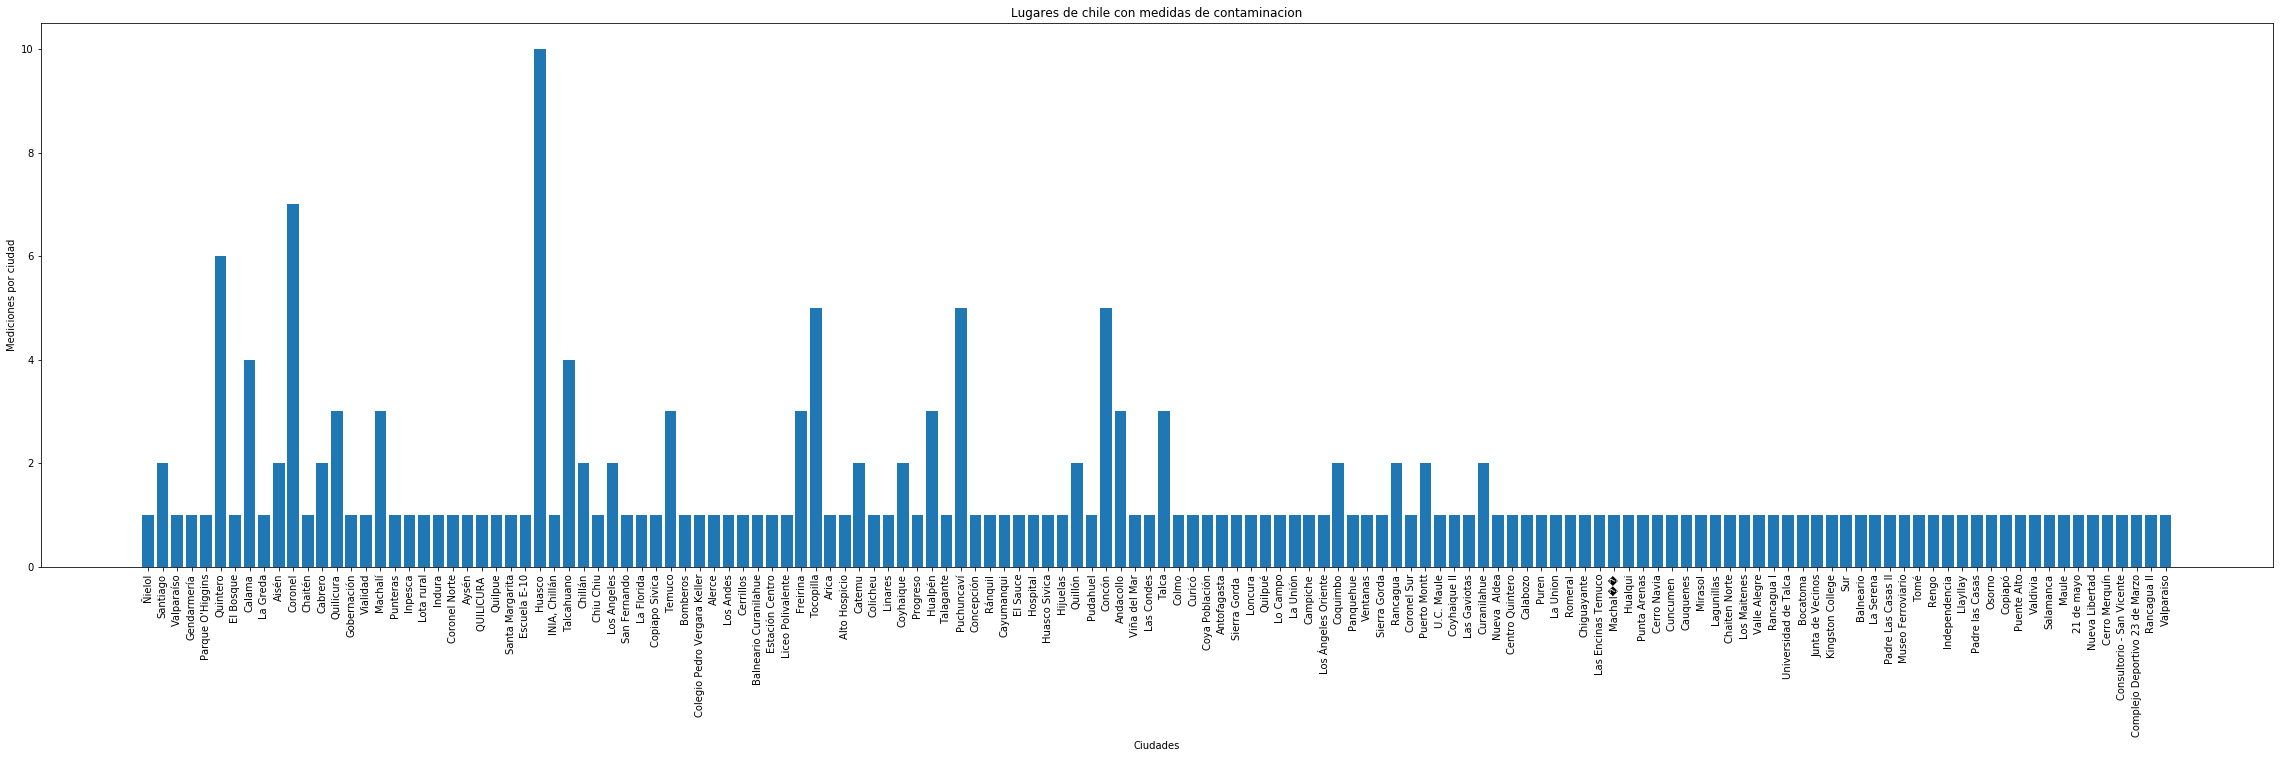

In [14]:
plt.figure(figsize=(40,10))
x_co = chile_df2['city']
y_co = chile_df2['locations']
plt.xlabel('Ciudades')
plt.ylabel('Mediciones por ciudad')
plt.title('Lugares de chile con medidas de contaminacion')
plt.xticks(rotation=90)
plt.bar(x_co,y_co)
plt.show()


# 2. Utilizar el SGBD no relacional Mongo 

MongoDB es un SGBD creado en 2009 (en 2018: version 4). Es un SGBD que no implementa el modelo Relacional (Tabla/Tupla/Claves, datos atómicos) como MySQL o PostgreSQL. La idea inicial de Mongo es ofrecer una solución simple para almacenar objetos JSON.

En Mongo, los conceptos claves son:
- los <b>Documentos</b>: un documento corresponde a objeto JSON.
- las <b>Colecciones</b>: una colección es un conjunto de documentos. Nota Bene: en una colección Mongo, los documentos pueden tener una estructura distinta.

En Mongo, no existen directamente los conceptos de Tabla, Tupla o Claves primerias/foraneas. Sin embargo, podemos ver una equivalencia entre Tabla y Colección, y entre Tupla y Documento.

Verificar que Mongo está instalado correctamente ejecutando:
- el programa principal del SGBD: <code>mongod &</code> desde un terminal
- el programa CLI (Command Line Interface): <code>mongo</code>

Vamos a interactuar con Mongo desde un entorno Python, por lo tanto utilizaremos el driver <code>PyMongo</code> (que instalar).


In [17]:
import pymongo
from pymongo import MongoClient

#Nos conectamos a la instancia de Mongo local, puerto 27017
client = MongoClient('localhost', 27017)

#Nos conectamos a la BD 'notebook5_db'
db = client['notebook5_db']

#Dentro de la BD, creamos una nueva colección llamada 'personas'
collection = db['personas']

A continuación, mostramos un ejemplo de como insertar nuevos documentos en una colección:

In [18]:
#Creamos un nuevo documento

aDocument = {"Nombre":"Juan", "Edad":23, "Asignaturas":["INFO261", "INFO267", "INFO268"] }
otherDocument = {"Nombre":"Maria", "Edad":24, "Asignaturas":["INFO261", "INFO267", "INFO268", "INFO331"] }

collection.insert_many([aDocument,otherDocument])

Un ejemplo de como consultar nuestra colección agregando un filtro para ver solamente los documentos que tienen un campo "Edad"=23.

In [19]:
from pprint import pprint

for doc in collection.find({"Edad":23}):
    pprint(doc)

{'Asignaturas': ['INFO261', 'INFO267', 'INFO268'],
 'Edad': 23,
 'Nombre': 'Juan',
 '_id': ObjectId('5c25198cb1baf3100290c38e')}


Para más detalles sobre la API de Mongo y PyMongo para hacer consultas:
- http://api.mongodb.com/python/current/tutorial.html
- https://docs.mongodb.com/manual/crud/

<b>Ejercicio</b>
- crear/borrar/modificar documentos desde Mongo CLI y desde PyMongo 
- realizar algunas consultas básicas

# 3. Trabajo práctico 1

1. En el marco de un proyecto "Smart City Valdivia", se desea almacenar mediciones de particulas en el aire en Valdivia a partir de la API OpenAQ. Estos datos se cruzaron a posteriori con datos meteorologicos de Valdivia (por ejemplo desde la API https://openweathermap.org/api). Diseñar un modelo Entidad-Asociación que permita almacenar esta información y extenderla a otras ciudades del sur de Chile.

2. Proponer un modelo de documentos JSON para almacenar está información en Mongo.

3. Conectarse a la API OpenAQ para empezar a llenar su base de datos Mongo.


# 4. Trabajo práctico 2

1. Conectarse a la API de Twitter.

2. Recopilar una lista de usuarios que utilizan el hashtag #ValdiviaCL en sus tweets.




In [59]:
#Ejercicio 3

import pymongo
from pymongo import MongoClient
import requests
#from datetime import datetime

client = MongoClient('localhost', 27017)
db = client['clima_db']
collection = db['medicion']

# api-endpoint 
endpoint = "https://api.openaq.org/v1/measurements"
parameters = "?country=CL&city=Valdivia&include_fields=&limit=1000&date_from=2018-10-25&date_to=2018-10-27"
URL = endpoint+parameters
URL = endpoint+parameters
r = requests.get(url = URL) 
# extracting data in json format 
data = r.json() 
#Fase de normalización que permite transformar un objeto JSON en columnas
from pandas.io.json import json_normalize
data_normalized=json_normalize(data['results'])

valdivia_df = pd.DataFrame(data_normalized)

valdivia_df2=valdivia_df[['city','date.local','parameter','value']]
#Renombrar la columna "date.local" para simplificar
valdivia_df2 = valdivia_df2.rename(columns={'date.local': 'date'})
valdivia_df2.head(10)



,city,date,parameter,value
0,Valdivia,2018-10-26T21:00:00-03:00,pm10,19.00
1,Valdivia,2018-10-26T21:00:00-03:00,co,223.08
2,Valdivia,2018-10-26T21:00:00-03:00,so2,2.31
3,Valdivia,2018-10-26T21:00:00-03:00,pm25,11.00
4,Valdivia,2018-10-26T20:00:00-03:00,pm25,10.00
5,Valdivia,2018-10-26T20:00:00-03:00,so2,2.28
6,Valdivia,2018-10-26T20:00:00-03:00,pm10,16.00
7,Valdivia,2018-10-26T20:00:00-03:00,co,204.93
8,Valdivia,2018-10-26T19:00:00-03:00,pm25,5.00
9,Valdivia,2018-10-26T19:00:00-03:00,pm10,23.00


In [64]:
#Ejercicio 4

import tweepy #sudo pip3 install tweepy
 
# Consumer keys and access tokens, used for OAuth
consumer_key="VrrWb0wDoG2YvkVOXY0krIdP1"
consumer_secret="LINi3AaqDBYD4OeYPV752WuKMMgPMSo1evUhOu0afQwjdaK5tL"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
access_token="976231636642779137-3usy7F6Misxicy7WLQA3wbUJckWtjEb"
access_token_secret="n5QG8GnHdWGNRCVNGTc8JSlqePbmi3dBuumhpWjknBKYG"
 
# OAuth process, using the keys and tokens
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
 
# Creation of the actual interface, using authentication
api = tweepy.API(auth)

#listHast=api.search(q="ValdiviaCL")
query = '#ValdiviaCL'
max_tweets = 100
listHast = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]
#print(len(listHast))
print("Lista de ususario que ocuparon #ValdiviaCl")
for rt in listHast:
    print ("@"+rt.user.screen_name)

Lista de ususario que ocuparon #ValdiviaCl
@jaquerivers07
@UAustraldeChile
@segegoblosrios
@draportillovet
@ValdiviaCapital
@ParaTiValdivia
@ParaTiValdivia
@aleckz05
@redpanguipulli
@claudiagutchile
@InforiosCL
@isabelmosqueir
@Cooperativa
@soydevaldivia
@Vera2Patricio
@Vera2Patricio
@VinculacionUACh
@vikkyta1972
@ValdiviaCapital
@valdichileno
@PDI_LosRios
@CaterinaColpo
@jiba1971
@InforiosCL
@MarioP2307
@rioenlinea
@patolizama1
@eguticon
@AndreaGidi
@AndreaGidi
@nubeblack17
@rodrigompozas
@DonPatoPatricio
@rceballoss
@SaldivarG_L
@robles_astorga
@ImagenSurZAL
@ImagenSurZAL
@DrRosasDiputado
@DrRosasDiputado
@patriciorosas
@NancyAg66
@campephilus
@mariaanachinita
@NancyAg66
@jiba1971
@informavaldivia
@jiba1971
@informavaldivia
@HelioHidraulico
@ricardomunz
@rodrigompozas
@ricardomunz
@JPdelaSotta
@chiledecide
@chiledecide
@chiledecide
@informavaldivia
@chiledecide
@informavaldivia
@informavaldivia
@informavaldivia
@informavaldivia
@informavaldivia
@chiledecide
@chiledecide
@chiledecide
